Links to all dataset used:

[Renewable generated](https://www.eia.gov/international/data/world/electricity/more-electricity-data?pd=2&p=0000000000000000000007vo700001vm&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1577836800000)

[Net Imports](https://www.eia.gov/international/data/world/electricity/electricity-net-imports?pd=2&p=000000000000000000000000000000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1577836800000)

[Net generated](https://www.eia.gov/international/data/world/electricity/electricity-generation?pd=2&p=00000000000000000000000000000fvu&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1577836800000)

[Net consumption](https://www.eia.gov/international/data/world/electricity/electricity-consumption?pd=2&p=0000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1577836800000)

[Exports](https://www.eia.gov/international/data/world/electricity/electricity-exports?pd=2&p=000000000000000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1577836800000)

[IMports](https://www.eia.gov/international/data/world/electricity/electricity-imports?pd=2&p=0000000000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1577836800000)

[population](https://data.worldbank.org/indicator/SP.POP.TOTL)


In [110]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import matplotlib.pyplot as plt
%matplotlib inline

populationdf = pd.read_csv("world population.csv", skiprows=3)
populationdf.columns = [x.lower().strip() for x in populationdf.columns]
# populationdf = populationdf.iloc[:, :-1]
populationdf.drop(populationdf.columns[[1,2,3]], axis=1, inplace=True)
populationdf.loc[67, 'country name'] = 'Egypt'
populationdf.set_index('country name', inplace=True)
populationdf = populationdf.loc[:, '1980':'2019']

populationdf.reset_index(inplace=True)
populationdf

,country name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,60097.0,60561.0,61341.0,62213.0,62826.0,63024.0,62645.0,61838.0,61072.0,...,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0
1,Africa Eastern and Southern,227305945.0,234058404.0,240999134.0,248146290.0,255530063.0,263161451.0,271050065.0,279184536.0,287524258.0,...,518468229.0,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0
2,Afghanistan,13356500.0,13171679.0,12882518.0,12537732.0,12204306.0,11938204.0,11736177.0,11604538.0,11618008.0,...,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0
3,Africa Western and Central,155882270.0,160223588.0,164689764.0,169279422.0,173991851.0,178826553.0,183785612.0,188868567.0,194070079.0,...,350556886.0,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0
4,Angola,8341290.0,8640478.0,8952971.0,9278104.0,9614756.0,9961993.0,10320116.0,10689247.0,11068051.0,...,23356247.0,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0
262,"Yemen, Rep.",7941903.0,8231905.0,8541605.0,8869363.0,9213078.0,9572170.0,9941102.0,10322044.0,10730864.0,...,23154854.0,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0
263,South Africa,28556771.0,29333095.0,30150448.0,30993762.0,31841588.0,32678876.0,33495956.0,34297727.0,35100905.0,...,51216967.0,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0
264,Zambia,5851818.0,6055361.0,6265869.0,6481907.0,6701547.0,6923148.0,7146965.0,7372835.0,7598270.0,...,13605986.0,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0


In [111]:
countries = ['Nigeria', 'Egypt', 'South Africa']
top_pop = populationdf[populationdf['country name'].isin(countries)]
top_pop.set_index('country name', inplace=True)
top_pop = top_pop/1000000
top_pop

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country name,,,,,,,,,,,,,,,,,,,,,
Egypt,43.309063,44.400113,45.539295,46.728284,47.968643,49.258726,50.602360,51.991696,53.399243,54.788680,...,82.761244,84.529251,86.422240,88.404652,90.424668,92.442549,94.447071,96.442590,98.423602,100.388076
Nigeria,73.423646,75.440505,77.427539,79.414841,81.448757,83.562776,85.766396,88.048029,90.395278,92.788039,...,158.503203,162.805080,167.228803,171.765819,176.404931,181.137454,185.960244,190.873247,195.874685,200.963603
South Africa,28.556771,29.333095,30.150448,30.993762,31.841588,32.678876,33.495956,34.297727,35.100905,35.930056,...,51.216967,52.003759,52.832659,53.687125,54.544184,55.386369,56.207649,57.009751,57.792520,58.558267


In [112]:
egypt = top_pop.iloc[0]
nigeria = top_pop.iloc[1]
sa = top_pop.iloc[2]

In [113]:
x_data = top_pop.columns
x_data

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

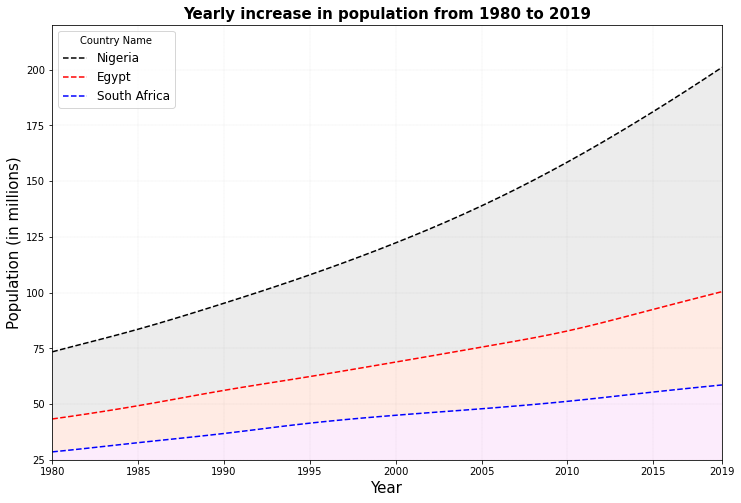

In [114]:
plt.figure(figsize=(12,8))

plt.plot(x_data, nigeria, color='k', linestyle='--', label ='Nigeria')
plt.plot(x_data, egypt, color='r', linestyle='--', label ='Egypt')
plt.plot(x_data, sa, color='b', linestyle='--', label ='South Africa')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Population (in millions)',fontsize=15)
plt.title('Yearly increase in population from 1980 to 2019', fontdict={'fontweight':'bold', 'fontsize':15})

points = [0, 5, 10, 15, 20, 25, 30, 35, 39]
year = ['1980', '1985','1990', '1995', '2000', '2005', '2010', '2015', '2019']
plt.xticks(points, year)
plt.xlim(0, 39)
plt.ylim(25, 220)
plt.legend(loc=0, frameon=True, title= 'Country Name', fontsize=12)
plt.grid(True, color='k', linestyle=':', linewidth=0.08)
# plt.tight_layout()

plt.gca().fill_between(range(len(x_data)), 
                       nigeria, egypt, 
                       facecolor='grey', 
                       alpha=0.15)

plt.gca().fill_between(range(len(x_data)), 
                       egypt, sa, 
                       facecolor='coral', 
                       alpha=0.15)

plt.gca().fill_between(range(len(x_data)), 
                       0, sa, 
                       facecolor='violet', 
                       alpha=0.15)

plt.savefig('population.png')

# ax.set_xticklabels(xticklabels, rotation = 45, ha="right")

# x = plt.gca().xaxis

# # rotate the tick labels for the x axis
# for item in x.get_ticklabels():
#     item.set_rotation(0)

In [115]:
generateddf = pd.read_csv("net generation.csv",skiprows=1, dtype=str)
generateddf.columns = [x.lower().strip() for x in generateddf.columns]
# renewabledf.drop('api', axis=1, inplace=True)
generateddf.drop(index=generateddf.index[[0]],columns=['api'], inplace=True)
generateddf = generateddf.loc[1:231]
generateddf = generateddf.iloc[:, :-1]
generateddf.rename(columns={'unnamed: 1':'country_name'},inplace=True)
generateddf["country_name"] = generateddf["country_name"].replace(r"\s+", "",regex=True)
    
generateddf

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,World,8017.640647990399,8073.029930190824,8254.670052240588,8593.05436902506,9084.08692850209,9459.93119807908,9656.20654685241,10096.02729470361,10528.8576848875,...,20462.297382659,21182.464923586,21636.039793027,22336.416849964,22744.96297694,23174.30180475,23815.91861345,24437.70874253,25355.56144809,25826.658724486
2,Afghanistan,0.942,0.992,0.952,1,1.019,1.034,1.135,1.218,1.08,...,0.9363,0.7713,0.882,1.1034,1.159,1.1832,1.2147,1.26426,1.16493,1.06269
3,Albania,3.635,3.673,3.692,3.71,3.737,3.783,3.814,4.236,3.93,...,7.49277,4.14694,4.67865,6.89041,4.67776,5.83705,7.70618,4.48075,8.46748,5.17594
4,Algeria,6.683,7.65,8.824,9.615,10.537,11.569,12.214,13.014,14.08,...,42.9985,48.17578,53.9846,56.3135,60.40082,64.68244,66.75504,71.49546,72.10903,76.685
5,AmericanSamoa,0.07,0.067,0.067,0.071,0.069,0.083,0.075,0.081,0.091,...,0.159,0.155,0.157,0.156,0.156,0.163,0.17,0.167,0.163,0.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,WakeIsland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,WesternSahara,0.072,0.072,0.073,0.073,0.073,0.071,0.074,0.076,0.077,...,0,0,0,0,0,0,0,0,0,0
229,Yemen,0.471,0.54,0.647,0.721,0.818,0.855,1.094,1.183,1.565,...,7.2917,5.83376,6.65162,7.99494,7.19624,5.91732,4.51142,3.80764,3.27988,3.43092
230,Zambia,9.172,9.809,10.024,10.051,9.912,9.958,9.811,8.455,8.396,...,10.409304,11.447532,12.31092,13.231964,14.358504,13.359864,11.620963,14.312033,15.981004,15.999165


In [28]:
generateddf[generateddf['country_name'] == 'Nigeria']

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
151,Nigeria,6.867,7.84,8.14,8.283,8.573,9.929,11.396,10.753,11.155,...,24.88918,25.72294,27.30418,27.45958,30.6119,30.80797,32.00801,32.79439,30.56746,29.32448


In [116]:
countries = ['Nigeria', 'Egypt', 'SouthAfrica']
top_gen = generateddf[generateddf['country_name'].isin(countries)]
top_gen.set_index('country_name', inplace=True)
top_gen = top_gen.apply(pd.to_numeric)
top_gen

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_name,,,,,,,,,,,,,,,,,,,,,
Egypt,18.256,20.498,19.939,22.48705,29.31605,32.30005,33.4841,36.7441,35.4011,37.6951,...,139.05724,136.46734,142.00562,145.54730,151.98830,163.58664,167.73298,174.994584,177.831464,182.98812
Nigeria,6.867,7.840,8.140,8.28300,8.57300,9.92900,11.3960,10.7530,11.1550,12.2510,...,24.88918,25.72294,27.30418,27.45958,30.61190,30.80797,32.00801,32.794390,30.567460,29.32448
SouthAfrica,93.073,106.932,111.915,113.87000,127.39500,133.23600,138.2740,142.0100,148.1320,153.3900,...,241.98442,243.45328,239.86204,237.48478,235.48395,230.41804,234.01529,235.720280,234.681520,231.84887


In [117]:
egypt = top_gen.iloc[0]
nigeria = top_gen.iloc[1]
sa = top_gen.iloc[2]

In [118]:
x_data = top_gen.columns
x_data

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

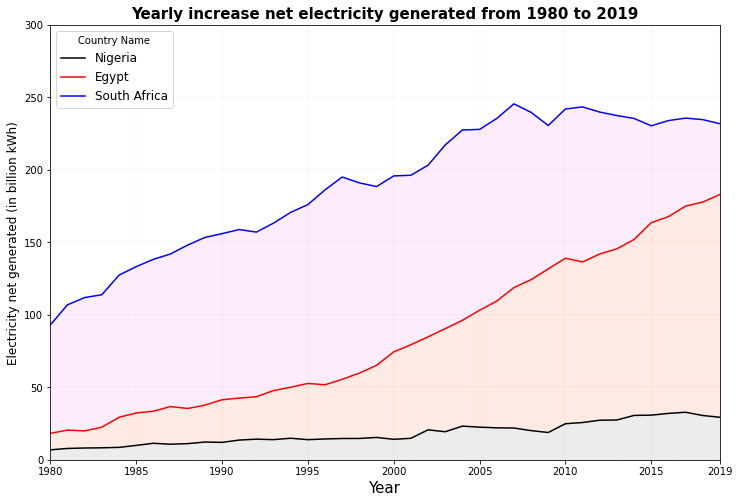

In [119]:
plt.figure(figsize=(12,8))

plt.plot(x_data, nigeria, color='k', label ='Nigeria')
plt.plot(x_data, egypt, color='r', label ='Egypt')
plt.plot(x_data, sa, color='b', label ='South Africa')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Electricity net generated (in billion kWh)',fontsize=12)
plt.title('Yearly increase net electricity generated from 1980 to 2019', fontdict={'fontweight':'bold', 'fontsize':15})

points = [0, 5, 10, 15, 20, 25, 30, 35, 39]
year = ['1980', '1985','1990', '1995', '2000', '2005', '2010', '2015', '2019']
plt.xticks(points, year)
plt.xlim(0, 39)
plt.ylim(0, 300)
plt.legend(loc=2, frameon=True, title= 'Country Name', fontsize=12)
plt.grid(True, color='k', linestyle=':', linewidth=0.08)

# plt.autoscale() 

plt.gca().fill_between(range(len(x_data)), 
                       0, nigeria, 
                       facecolor='grey', 
                       alpha=0.15)

plt.gca().fill_between(range(len(x_data)), 
                       egypt, nigeria, 
                       facecolor='coral', 
                       alpha=0.15)

plt.gca().fill_between(range(len(x_data)), 
                       egypt, sa, 
                       facecolor='violet', 
                       alpha=0.15)

plt.savefig('electricity.png')